<a href="https://colab.research.google.com/github/maciekSzubiczuk/GUM/blob/main/lab2a_maciej_szubiczuk_lukasz_kielczewski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

SEED       = 42
TICKER     = "AAPL"
LOOK_BACK  = 10
BATCH_SIZE = 32
EPOCHS     = 50

tf.random.set_seed(SEED)
np.random.seed(SEED)

data = yf.download(TICKER, start="2020-01-01", end="2023-12-31")
data = data[["Open"]].dropna()
data.index = pd.to_datetime(data.index)

trainval = data.loc["2020":"2022"].copy()
test     = data.loc["2023"].copy()

scaler = MinMaxScaler()
trainval_scaled = scaler.fit_transform(trainval)
test_scaled     = scaler.transform(test)

def make_sequences(series, look_back=LOOK_BACK):
    """Zamienia 1-wymiarową tablicę na pary X (sekwencja)
       i y (następny punkt)."""
    X, y = [], []
    for i in range(look_back, len(series)):
        X.append(series[i-look_back:i])
        y.append(series[i])
    return np.array(X), np.array(y)

X_tv, y_tv = make_sequences(trainval_scaled)
X_test, y_test = make_sequences(
    np.concatenate([trainval_scaled[-LOOK_BACK:], test_scaled])
)

X_tv   = X_tv.reshape((-1, LOOK_BACK, 1))
X_test = X_test.reshape((-1, LOOK_BACK, 1))

split_idx   = int(len(X_tv) * 0.7)
X_train, y_train = X_tv[:split_idx], y_tv[:split_idx]
X_val,   y_val   = X_tv[split_idx:], y_tv[split_idx:]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
rnn_model = Sequential([
    SimpleRNN(20, input_shape=(LOOK_BACK, 1)),
    Dense(1)
])
rnn_model.compile(optimizer="adam", loss="mse")

rnn_model.summary()
rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

lstm_model = Sequential([
    LSTM(20, return_sequences=True, input_shape=(LOOK_BACK, 1)),
    LSTM(20),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

lstm_model.summary()
lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1226 - val_loss: 0.0072
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - val_loss: 0.0211
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 20)         │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,061 (19.77 KB)

 Trainable params: 5,061 (19.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.2153 - val_loss: 0.0308
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - val_loss: 0.0034
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015 - val_loss: 0.0033



=== WALIDACJA (2020-2022) ===
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RNN        | MSE: 0.001055 | MAE: 0.026761
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
LSTM       | MSE: 0.002597 | MAE: 0.041752

=== TEST (2023) ===
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RNN        | MSE: 0.000693 | MAE: 0.021804
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
LSTM       | MSE: 0.003635 | MAE: 0.051266


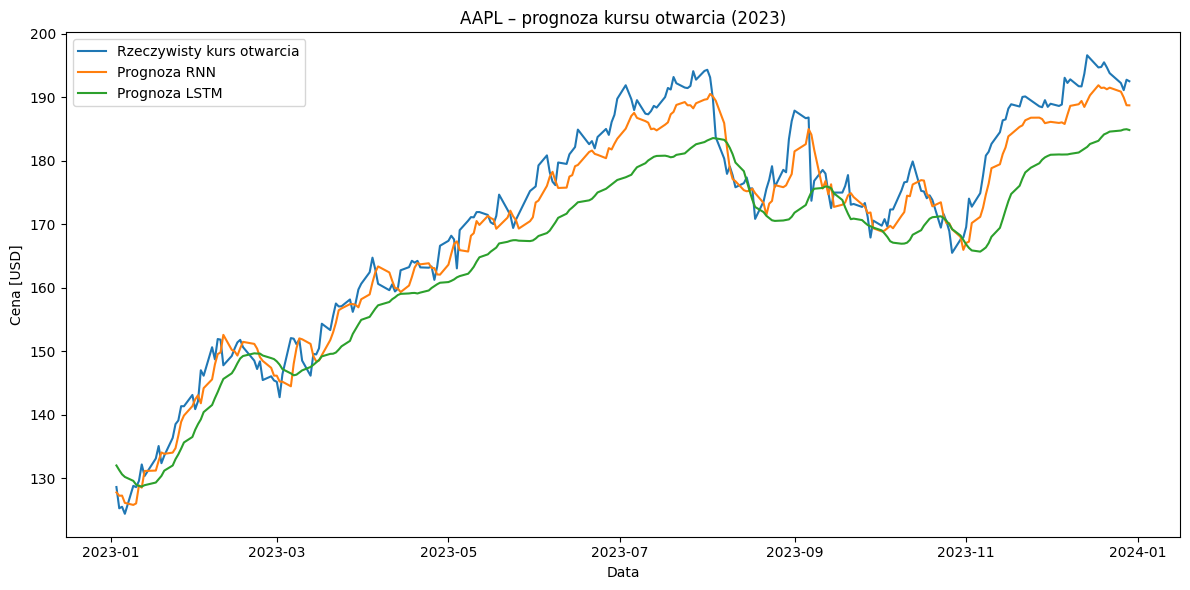

In [4]:
def evaluate(model, X, y, name):
    pred = model.predict(X)
    mse  = mean_squared_error(y, pred)
    mae  = mean_absolute_error(y, pred)
    print(f"{name:10s} | MSE: {mse:.6f} | MAE: {mae:.6f}")
    return scaler.inverse_transform(pred)

print("\n=== WALIDACJA (2020-2022) ===")
_ = evaluate(rnn_model,  X_val,   y_val,   "RNN")
_ = evaluate(lstm_model, X_val,   y_val,   "LSTM")

print("\n=== TEST (2023) ===")
pred_rnn  = evaluate(rnn_model,  X_test, y_test, "RNN")
pred_lstm = evaluate(lstm_model, X_test, y_test, "LSTM")

actual_2023 = scaler.inverse_transform(y_test.reshape(-1, 1))

df_plot = pd.DataFrame({
    "Actual 2023": actual_2023.flatten(),
    "RNN forecast": pred_rnn.flatten(),
    "LSTM forecast": pred_lstm.flatten()
}, index=test.index)

plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot["Actual 2023"], label="Rzeczywisty kurs otwarcia")
plt.plot(df_plot.index, df_plot["RNN forecast"], label="Prognoza RNN")
plt.plot(df_plot.index, df_plot["LSTM forecast"], label="Prognoza LSTM")
plt.title(f"{TICKER} – prognoza kursu otwarcia (2023)")
plt.xlabel("Data")
plt.ylabel("Cena [USD]")
plt.legend()
plt.tight_layout()
plt.show()